# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy.polynomial.polynomial as polynomial

body,crossover,hatch,other,sedan,vagon,van
car,,,,,,
Acura,23409.833333,0.000000,0.000000,14392.571429,0.000000,0.000000
Alfa Romeo,0.000000,10299.750000,0.000000,9316.666667,2350.000000,0.000000
Aro,3600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aston Martin,0.000000,0.000000,65000.000000,125000.000000,0.000000,0.000000
Audi,37094.847403,19327.052632,28293.285714,13648.837558,9202.203704,3000.000000
...,...,...,...,...,...,...
Volvo,28460.923077,19899.000000,0.000000,11123.687500,13450.000000,0.000000
Wartburg,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
ZAZ,0.000000,2719.133750,2328.777778,3850.509771,1057.550000,1666.666667


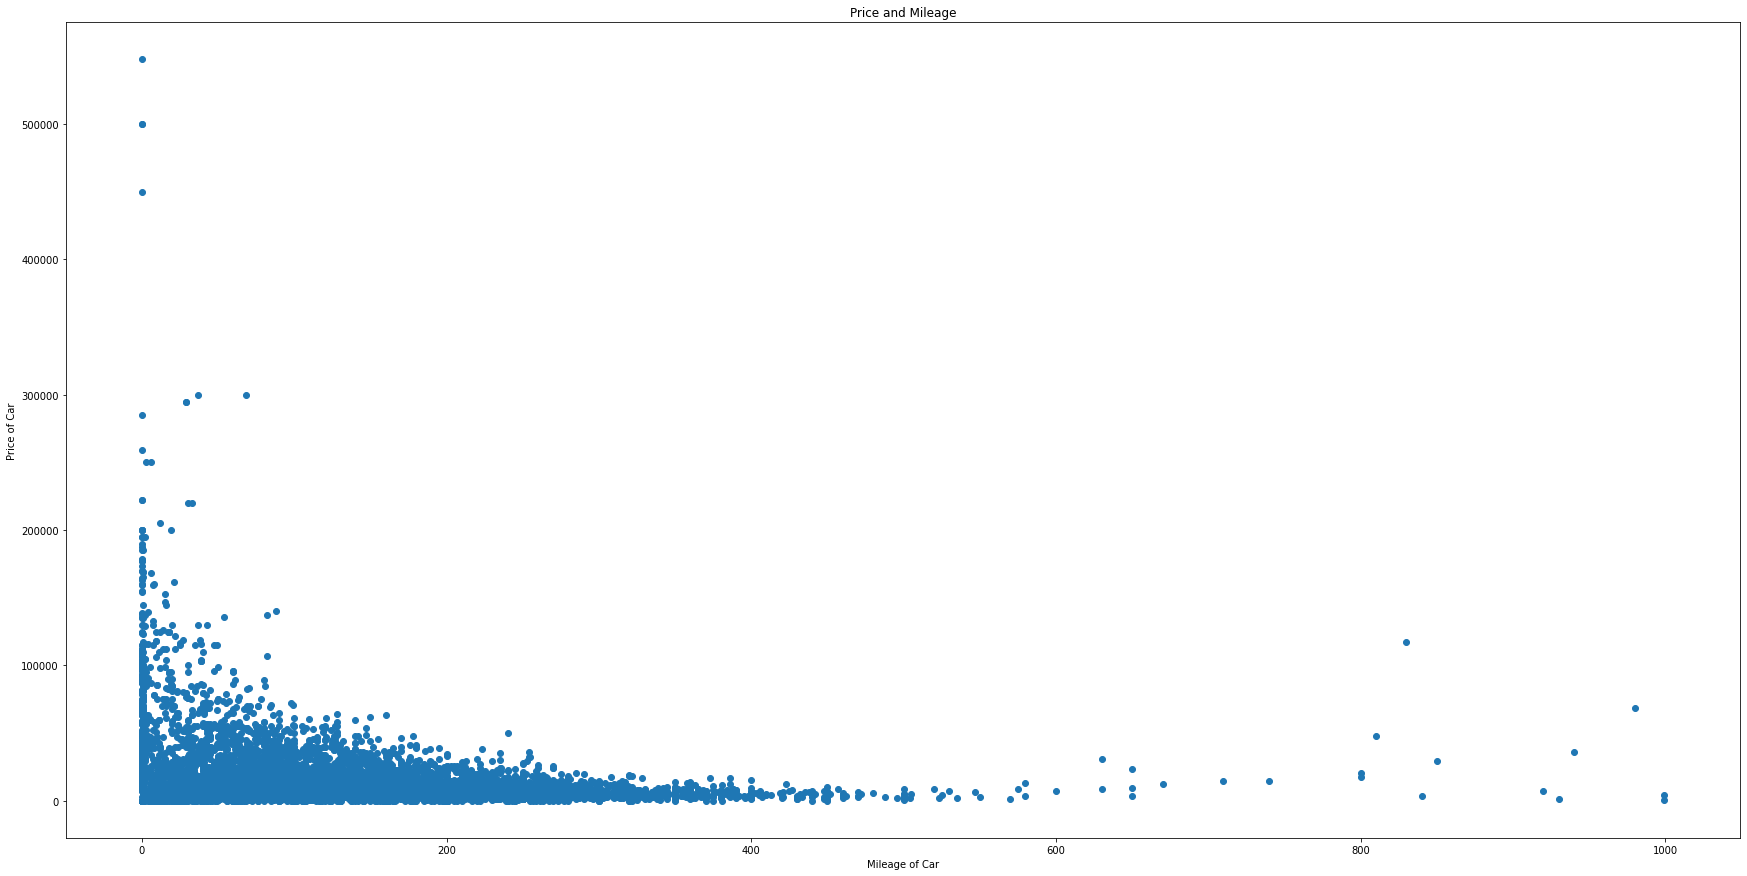

In [2]:
df_sales=pd.read_csv("car_sales.csv")

pivot_brand=df_sales.pivot_table(values='price', columns=['body'], index=['car'], aggfunc=np.mean, fill_value=0)
display(pivot_brand)

plt.figure(figsize=(30, 15))
plt.scatter(data=df_sales, x='mileage', y='price')
plt.xlabel('Mileage of Car')
plt.ylabel('Price of Car')
plt.title('Price and Mileage')

plt.show()


Usually, the lower the mileage, the more expensive the car is, though there are execptions, likely due to overused but generally expensively price cars.

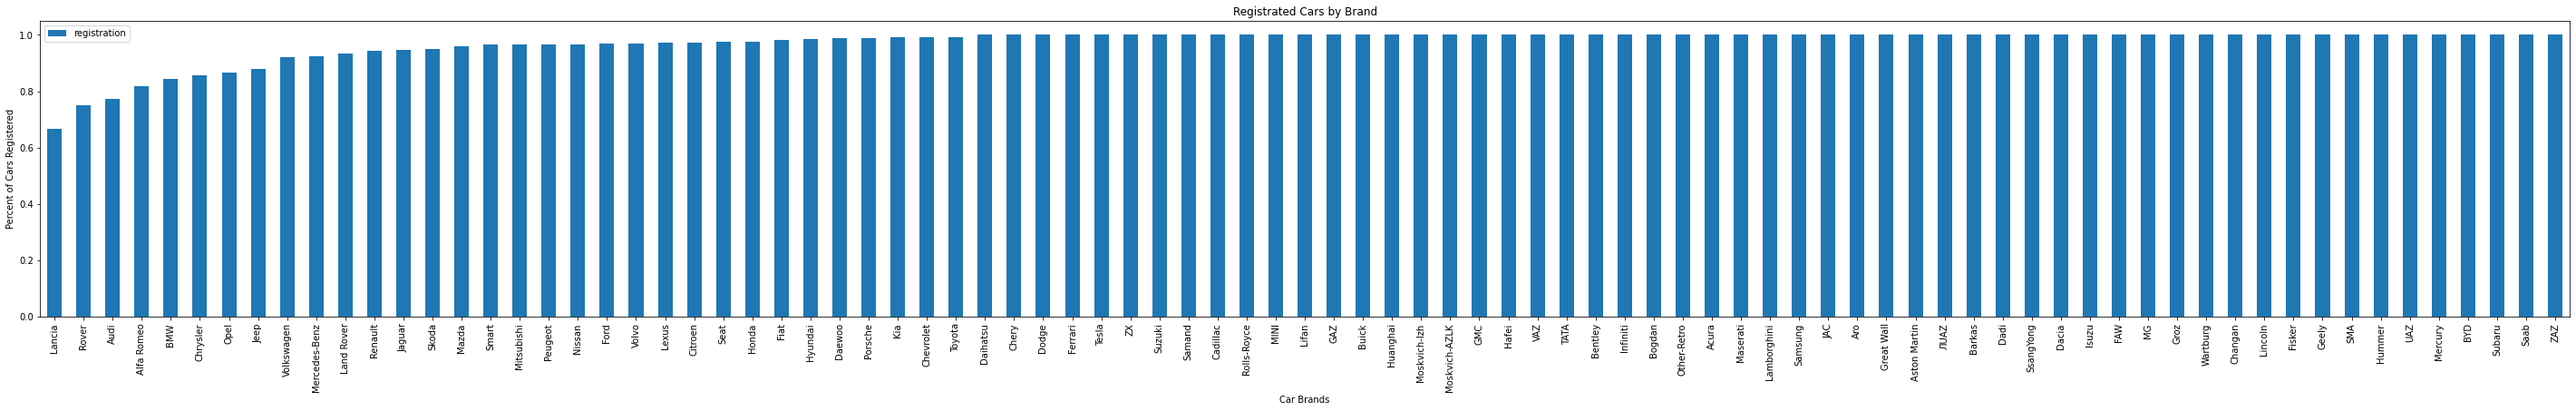

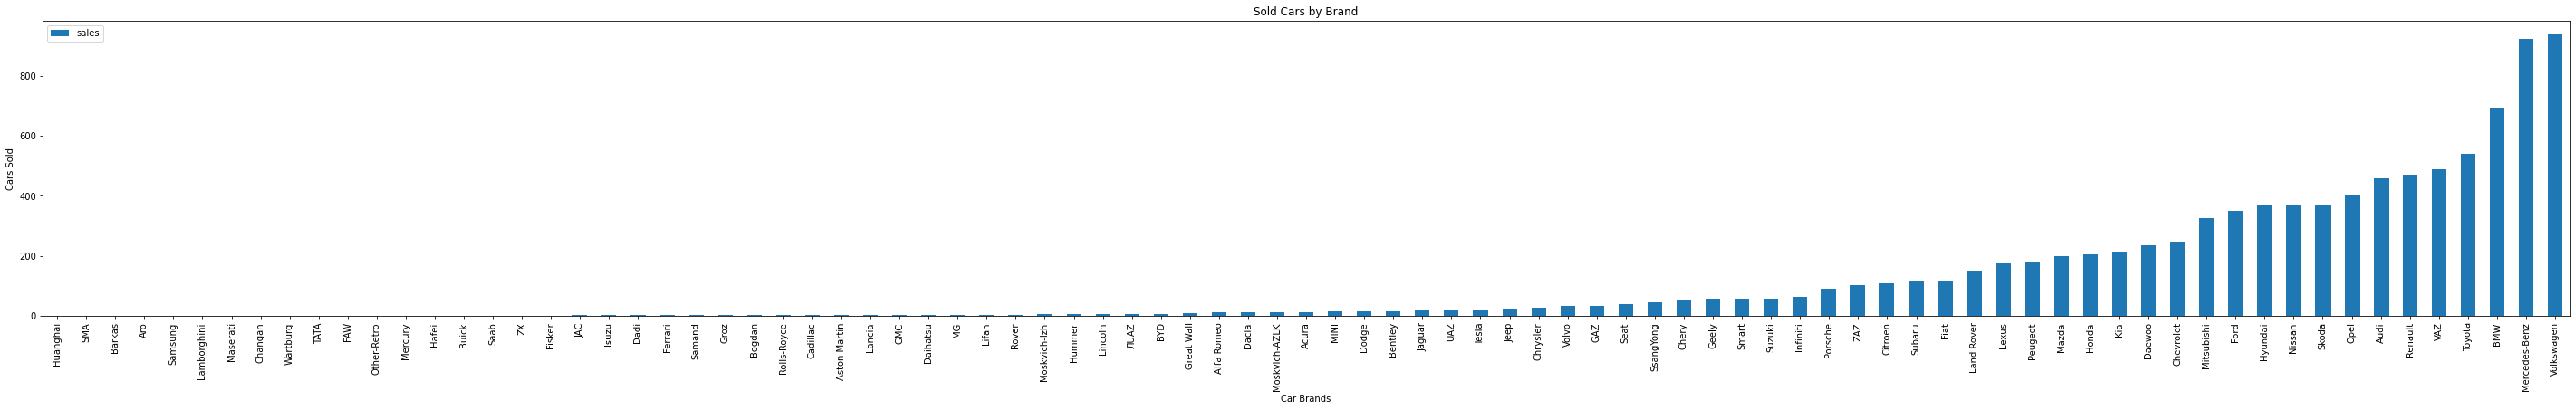

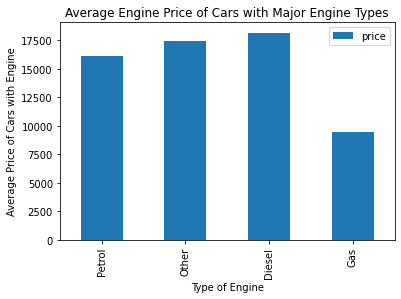

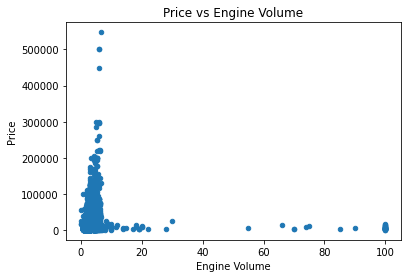

In [3]:
df_brand_data=pd.DataFrame(
    {
        "car": list(set(df_sales['car'])),
        "registration": [len(df_sales.loc[df_sales['car']==i].loc[df_sales['registration']=='yes'])/len(df_sales.loc[df_sales['car']==i]) for i in list(set(df_sales['car']))],
        "sales": [len(df_sales.loc[df_sales['car']==i]) for i in list(set(df_sales['car']))]
    }
)

bar_registration=df_brand_data.sort_values(by='registration').plot.bar(x='car', y='registration', xlabel='Car Brands', ylabel='Percent of Cars Registered', title='Registrated Cars by Brand', figsize=(50, 6))

bar_popular=df_brand_data.sort_values(by='sales').plot.bar(x='car', y='sales', xlabel='Car Brands', ylabel='Cars Sold', title='Sold Cars by Brand', figsize=(50, 6))

most_popular=list(df_brand_data.sort_values(by='sales')['car'].tail(5))
least_popular=list(df_brand_data.sort_values(by='sales')['car'].head(5))

df_engine_data=pd.DataFrame(
    {
        "engType": list(set(df_sales['engType'])),
        "price": [np.mean(list(df_sales.loc[df_sales['engType']==i]['price'])) for i in list(set(df_sales['engType']))]
    }
)

bar_eng_price=df_engine_data.plot.bar(x='engType', y='price', xlabel='Type of Engine', ylabel='Average Price of Cars with Engine', title='Average Engine Price of Cars with Major Engine Types')

scatter_eng_volume=df_sales.plot.scatter(x='engV', y='price', xlabel='Engine Volume', ylabel='Price', title='Price vs Engine Volume')
